In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.2.0'

In [3]:
keras.__version__

'2.3.0-tf'

In [4]:
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

# Implementing MLPs with Keras

## MLP Classifier with Keras

### Load Fashion-Mnist

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

We already have test and train sets, but there is no validtion set. We take the first 5000 instances of train set as validtion data. We also have to divide X by 255 as they are integeres ranging from 0 to 255.

In [8]:
X_valid = X_train_full[:5000] / 255
X_train = X_train_full[5000:] / 255
y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

### Buid the Model

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.weights
model.layers[1].weights[0]
#...

<tf.Variable 'dense/kernel:0' shape=(784, 300) dtype=float32, numpy=
array([[ 5.0005317e-03,  4.8275076e-02,  6.6831321e-02, ...,
        -3.7374880e-02, -4.4567671e-02, -5.4067656e-02],
       [ 5.0262868e-02,  4.1076064e-02,  9.9862367e-03, ...,
         1.4931850e-02, -4.1348763e-02,  3.1678461e-02],
       [ 6.0329720e-02, -5.5264838e-02,  6.2995777e-03, ...,
         2.9861696e-02, -6.8815053e-03,  5.0895050e-02],
       ...,
       [ 5.2925199e-02, -1.8209077e-02, -8.1171840e-04, ...,
        -3.7999183e-02,  6.6826954e-02,  6.4481884e-02],
       [ 5.8864564e-02,  3.6653236e-02, -4.4441968e-04, ...,
        -2.8324425e-02, -1.7609753e-02, -4.2420998e-03],
       [ 2.4856031e-03, -3.3689469e-02,  2.7156048e-02, ...,
        -4.8972964e-03, -1.4385827e-02, -2.2687018e-05]], dtype=float32)>

In [12]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,optimizer="sgd", metrics=["accuracy"])

#### <font color='red'>Note</font>
"sparse_categorical_crossentropy" loss is used when output labels are sparse; i.e., for each class there is a target class index. If instead we had one target
probability per class for each instance (such as one-hot vectors, e.g. \[0.,
0., 0., 1., 0., 0., 0., 0., 0., 0.\] to represent class 3), then we
would need to use the "categorical_crossentropy" loss instead. "binary_crossentropy" is used in case of binary classification.

#### <font color='red'>TIP</font>
keras.utils.to_categorical function coverts sparse labels to one-hot vectors and np.argmax() with axis=1 can be used to go the other way round.

### Training and Evaluating

In [13]:
model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.7074 - accuracy: 0.7650 - val_loss: 0.5061 - val_accuracy: 0.8306
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4852 - accuracy: 0.8302 - val_loss: 0.4638 - val_accuracy: 0.8430
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4409 - accuracy: 0.8451 - val_loss: 0.4064 - val_accuracy: 0.8630
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4140 - accuracy: 0.8552 - val_loss: 0.4019 - val_accuracy: 0.8632
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3927 - accuracy: 0.8617 - val_loss: 0.3720 - val_accuracy: 0.8712
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3760 - accuracy: 0.8679 - val_loss: 0.3754 - val_accuracy: 0.8706
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3641 - accuracy: 0.8712 - val_loss: 0.3593 - val_accuracy:

If the training set was very skewed, with some classes being
overrepresented and others underrepresented, it would be useful to set the
class_weight argument when calling the fit() method, which would
give a larger weight to underrepresented classes and a lower weight to
overrepresented classes. These weights would be used by Keras when
computing the loss. If you need per-instance weights, set thesample_weight argument (it supersedes class_weight ). Per-instance
weights could be useful if some instances were labeled by experts while
others were labeled using a crowdsourcing platform: you might want to
give more weight to the former. You can also provide sample weights (but
not class weights) for the validation set by adding them as a third item in
the validation_data tuple.

#### model.history

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
his_df = pd.DataFrame(model.history.history)
his_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   loss          30 non-null     float64
 1   accuracy      30 non-null     float64
 2   val_loss      30 non-null     float64
 3   val_accuracy  30 non-null     float64
dtypes: float64(4)
memory usage: 1.1 KB


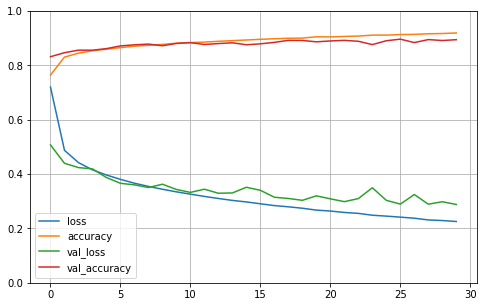

In [16]:
his_df.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

As the validation loss is still going down we can tell that the model has not converged yet. So we can continue training by calling fit() method again, since Keras continues training where it left off.

In [17]:
model.evaluate(X_test/255, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3320 - accuracy: 0.8856


[0.3320172429084778, 0.8855999708175659]

### Predict

In [18]:
X_new = X_test[:3]/255
y_prob = model.predict(X_new)
y_prob.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [19]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

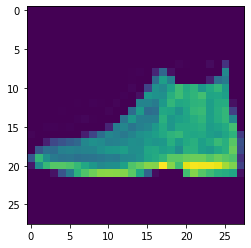

In [20]:
plt.imshow(X_test[0])

## MLP Regressor

In [17]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
housing = fetch_california_housing()

In [19]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [21]:
model = keras.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(optimizer="sgd", loss="mean_squared_error")
history = history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7987 - val_loss: 7.5633
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.9875 - val_loss: 1.5103
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5022 - val_loss: 15.4047
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 1.2449 - val_loss: 0.4158
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3971 - val_loss: 0.3973
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3808 - val_loss: 13.8622
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4003 - val_loss: 0.3961
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3731 - val_loss: 0.3904
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3753 - val_loss: 0.3801
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3643 - val_loss: 0.38

## Complex Models Using the Functional API

We can use functional API to build more complex models which are not completely sequential. As an example, we build Wide & Deep architecture below.
```
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])
```

We can now use methods like compile and fit with model object as usual.  
To Have multiple inputs or outputs, you can build those layers with proper shapes and then pass a list of inputs or outputs to the keras.Model() method.
```
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])
```

Note that when there are multiple input layers, you should pass tuples of input data with the right dimensions to fit, test, evalute and... methods. For example:
```
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
model.fit((X_train_A, X_train_B), y_train, epochs=20,
validation_data=((X_valid_A, X_valid_B), y_valid))
```

Adding multiple outputs is easy too. You should only pass a list of output layers to the Model and then specify a loss function for each output when compiling the model. Also, we need to provide labels for each output.
```
# Same as berfore, up to the main output layer
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output,
aux_output])

model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1],
optimizer="sgd")

model.fit(
[X_train_A, X_train_B], [y_train, y_train], epochs=20,
validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))
```

## Subclassing API

By using Subclassing API, you cn implement complex non-static models that include loops, conditional branching, etc. As an example, we implement WideAndDeep again with this method.

In [5]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(input_A)
        concat = keras.layers.concatenate([hidden1, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output


In [6]:
model = WideAndDeepModel()

This example looks very much like the Functional API, except we do not
need to create the inputs; we just use the input argument to the call()
method, and we separate the creation of the layers in the constructor
from their usage in the call() method. The big difference is that you can
do pretty much anything you want in the call() method: for loops, if
statements, low-level TensorFlow operations.  
This extra flexibility does come at a cost: your model’s architecture is
hidden within the call() method, so Keras cannot easily inspect it; it
cannot save or clone it; and when you call the summary() method, you
only get a list of layers, without any information on how they are
connected to each other. Moreover, Keras cannot check types and shapes
ahead of time, and it is easier to make mistakes.

#### <font color='red'>TIP</font>
Keras models can be used just like regular layers, so you can easily combine them to
build complex architectures.

## Saving and Restoring

When using the Sequential API or the Functional API, saving a trained
Keras model is as simple as it gets:
```
model = keras.layers.Sequential([...]) # or keras.Model([...])
model.compile([...])
model.fit([...])
model.save("my_keras_model.h5")
```
Loading the model is just as easy:
```
model = keras.models.load_model("my_keras_model.h5")
```

#### <font color='red'>Warning</font>
This will work when using the Sequential API or the Functional API, but
unfortunately not when using model subclassing. You can use save_weights() and
load_weights() to at least save and restore the model parameters, but you will
need to save and restore everything else yourself.

## Callbacks

Some useful callbacks:
- `keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True))`: Saves the model after each epoch.
- `keras.callbacks.EarlyStopping(patience=10,
restore_best_weights=True)`: Stops the training when there is no progress on the validtion set for a number of epochs.
```
model.fit(X_train, y_train, epochs=100,
validation_data=(X_valid, y_valid),
callbacks=[checkpoint_cb, early_stopping_cb])
```
You can also build your custom callbacks:
```
class PrintValTrainRatioCallback(keras.callbacks.Callback):
def on_epoch_end(self, epoch, logs):
print("\nval/train: {:.2f}".format(logs["val_loss"] /
logs["loss"]))
```
There are also other methods available to implement like `on_train_end`, `on_bactch_begin`, etc. Callbacks are also available during evaluation and prediction. To achieve that you should implement their specific methods, like: `on_test_batch_begin` for evaluation and `on_predict_end` for prediction.

## TensorBoard

Keras has a built-in callback for tensorboard:
```
keras.callbacks.TensorBoard(run_logdir)
```
Tensorboard can be started by running the following command in a temrminal:
```
tensorboard --logdir=./my_logs --port=6006
```
Alterbatively, you can run it directly within Jupyter, by running the following code:
```
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006
```